In [1]:
!pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations

     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
      --------------------------------------- 0.0/1.4 MB 660.6 kB/s eta 0:00:03
     -------------------------- ------------- 0.9/1.4 MB 11.9 MB/s eta 0:00:01
     ---------------------------------------- 1.4/1.4 MB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\Anaconda\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Anaconda\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Anaconda\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Anaconda\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 126, in _parse_req

In [14]:
!pip install labelme

  Using cached labelme-5.6.1.tar.gz (1.4 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached coloredlogs-15.0.1-py2.py3-none-any.whl.metadata (12 kB)
  Using cached humanfriendly-10.0-py2.py3-none-any.whl.metadata (9.2 kB)
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   ---------- ----------------------------- 2.1/7.7 MB 43.6 MB/s eta 0:00:01
   ---------------------- ----------------- 4.3/7.7 MB 45.3 MB/s eta 0:00:01
   ---------------------------------------  7.7/7.7 MB 54.3 MB/s eta 0:00:01
   ---------------------------------------- 7.7/7.7 MB 48.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ------------- -------------------------- 3.9/11.3 MB 124.2 MB/s eta 0:00:01
   --------------------------- ------------ 7.8/11.3 MB 100.4 MB/s eta 0:00:01
   ---------------------------------------  11.3/11.3 MB 81.8 MB/s eta 0:00:01
   ---------------------

In [2]:
!nvcc --version
!nvidia-smi


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Wed_Apr_17_19:36:51_Pacific_Daylight_Time_2024
Cuda compilation tools, release 12.5, V12.5.40
Build cuda_12.5.r12.5/compiler.34177558_0
Sat Feb 15 01:49:03 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 561.03                 Driver Version: 561.03         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A 

In [2]:
import os
import time
import uuid
import tensorflow as tf
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt

In [9]:
Images_path= os.path.join('data','images')
number_images =30

In [12]:
cap = cv2.VideoCapture(0)

# Check if the camera opened successfully
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()

    # Check if frame is read correctly
    if not ret:
        print("Error: Could not read frame.")
        break  

    imgname = os.path.join(Images_path, f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [20]:
!labelme

2025-02-15 02:07:15.673 | INFO     | labelme.config:get_config:66 - Loading config file from: C:\Users\surya\.labelmerc


In [19]:
pip install --upgrade pydantic


  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
   ---------------------------------------- 0.0/431.7 kB ? eta -:--:--
   --------------------------------------- 431.7/431.7 kB 13.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 42.0 MB/s eta 0:00:00
Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.12
    Uninstalling pydantic-1.10.12:
      Successfully uninstalled pydantic-1.10.12
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.2 requires numpy<2.1.0,>=2.0.0; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [3]:
import tensorflow as tf
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
     tf.config.experimental.set_memory_growth(gpu,True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

In [6]:
images= tf.data.Dataset.list_files('data\\images\\*.jpg',shuffle=False)

InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: data\\images\\*.jpg'

In [26]:
images.as_numpy_iterator().next()

b'data\\images\\327cb06f-eb6a-11ef-9498-c1b5df3818a2.jpg'

In [7]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [28]:
images = images.map(load_image)

In [29]:
images.as_numpy_iterator().next()

array([[[175, 176, 160],
        [174, 175, 159],
        [173, 174, 158],
        ...,
        [175, 176, 168],
        [176, 177, 169],
        [176, 177, 169]],

       [[173, 174, 158],
        [172, 173, 157],
        [172, 173, 157],
        ...,
        [176, 177, 169],
        [176, 177, 169],
        [177, 178, 170]],

       [[173, 174, 160],
        [173, 174, 160],
        [171, 173, 159],
        ...,
        [177, 178, 170],
        [177, 178, 170],
        [178, 179, 171]],

       ...,

       [[163, 166, 159],
        [163, 166, 159],
        [163, 166, 159],
        ...,
        [167, 172, 168],
        [167, 172, 168],
        [166, 171, 167]],

       [[160, 166, 156],
        [160, 166, 156],
        [160, 166, 156],
        ...,
        [168, 170, 167],
        [169, 171, 168],
        [167, 169, 166]],

       [[161, 167, 157],
        [160, 166, 156],
        [160, 166, 156],
        ...,
        [167, 169, 166],
        [168, 170, 167],
        [166, 168, 165]]

In [30]:
image_generator = images.batch(4).as_numpy_iterator()

In [31]:
plot_images = image_generator.next()

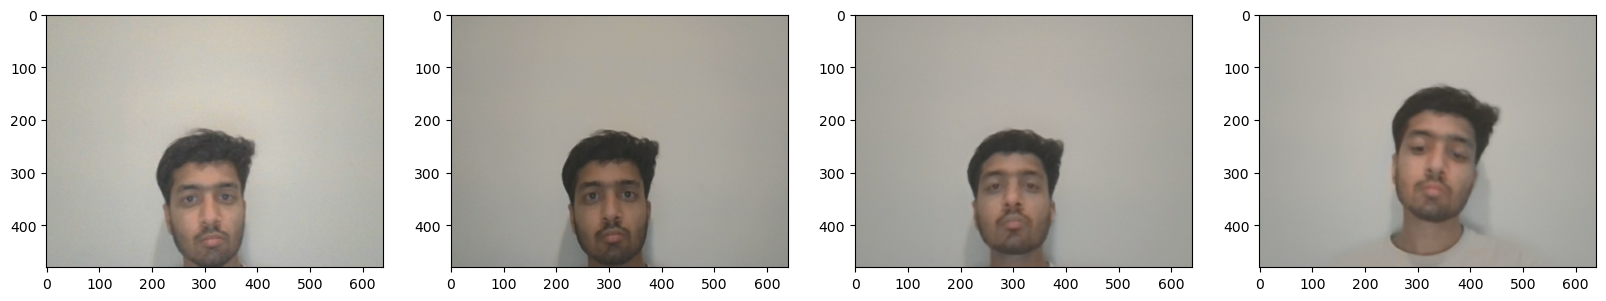

In [33]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

In [36]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data',folder,'images')):
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels',filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)

In [1]:
import albumentations as alb

In [40]:
!pip install --user albumentations


  Using cached albumentations-2.0.4-py3-none-any.whl.metadata (41 kB)
  Using cached albucore-0.0.23-py3-none-any.whl.metadata (5.3 kB)
  Using cached opencv_python_headless-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached albumentations-2.0.4-py3-none-any.whl (289 kB)
Using cached albucore-0.0.23-py3-none-any.whl (14 kB)
Using cached opencv_python_headless-4.11.0.86-cp37-abi3-win_amd64.whl (39.4 MB)


In [44]:
import sys
print(sys.executable)


C:\Anaconda\python.exe


In [45]:
!pip show albumentations

Name: albumentations
Version: 2.0.4
Summary: Fast, flexible, and advanced augmentation library for deep learning, computer vision, and medical imaging. Albumentations offers a wide range of transformations for both 2D (images, masks, bboxes, keypoints) and 3D (volumes, volumetric masks) data, with optimized performance and seamless integration into ML workflows.
Home-page: 
Author: Vladimir Iglovikov
Author-email: 
License: MIT License

Copyright (c) 2017 Vladimir Iglovikov, Alexander Buslaev, Alexander Parinov,

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission 

In [46]:
import sys
!{sys.executable} -m pip install albumentations


In [11]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                        bbox_params=alb.BboxParams(format='albumentations',
                                                   label_fields=['class_labels']))

In [12]:
img = cv2.imread(os.path.join('data','train','images','3a5801fd-eb6a-11ef-b100-c1b5df3818a2.jpg'))

In [16]:
with open(os.path.join('data','train','labels','3a5801fd-eb6a-11ef-b100-c1b5df3818a2.json'),'r') as f:
    label = json.load(f)

In [60]:
coords[0] = label['shapes'][0]['points'][0][0]  # x_min
coords[1] = label['shapes'][0]['points'][0][1]  # y_min
coords[2] = label['shapes'][0]['points'][1][0]  # x_max
coords[3] = label['shapes'][0]['points'][1][1]  # y_max

# Swap if y_min > y_max
if coords[1] > coords[3]:  # If y_min is greater than y_max
    coords[1], coords[3] = coords[3], coords[1]  # Swap values

# Swap if x_min > x_max
if coords[0] > coords[2]:  # If x_min is greater than x_max
    coords[0], coords[2] = coords[2], coords[0]  # Swap values

# Normalize the coordinates
#coords = list(np.divide(coords, [640, 480, 640, 480]))


In [61]:
coords = list(np.divide(coords,[640,480,640,480]))

In [62]:
# coords[3]= coords[1]+0.01

In [63]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

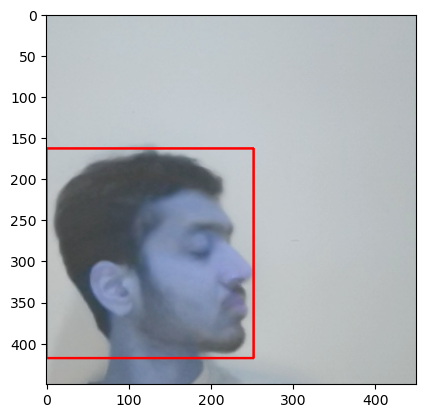

In [64]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2],[450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:],[450,450]).astype(int)),
              (255,0,0),2)

plt.imshow(augmented['image'])

In [66]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            # Swap if y_min > y_max
            if coords[1] > coords[3]:  # If y_min is greater than y_max
                coords[1], coords[3] = coords[3], coords[1]  # Swap values

            # Swap if x_min > x_max
            if coords[0] > coords[2]:  # If x_min is greater than x_max
                coords[0], coords[2] = coords[2], coords[0]  # Swap values

            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

In [68]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg',shuffle = False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [70]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg',shuffle = False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [71]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg',shuffle = False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [72]:
train_images.as_numpy_iterator().next()

array([[[0.7294118 , 0.6313726 , 0.6141544 ],
        [0.72775733, 0.6297181 , 0.61403185],
        [0.7176471 , 0.61960787, 0.6039216 ],
        ...,
        [0.6983456 , 0.6071691 , 0.56648284],
        [0.701777  , 0.6071691 , 0.576777  ],
        [0.6947304 , 0.60422796, 0.56917894]],

       [[0.719424  , 0.6213848 , 0.6056985 ],
        [0.7294118 , 0.6313726 , 0.615625  ],
        [0.73284316, 0.63480395, 0.61519605],
        ...,
        [0.6981005 , 0.60790443, 0.5765319 ],
        [0.7019608 , 0.6117647 , 0.58125   ],
        [0.7077206 , 0.6184436 , 0.58713233]],

       [[0.7230392 , 0.625     , 0.6093137 ],
        [0.7284926 , 0.6304534 , 0.61427695],
        [0.7327819 , 0.6347426 , 0.6151348 ],
        ...,
        [0.6931985 , 0.6030024 , 0.579473  ],
        [0.69797796, 0.6077819 , 0.5842525 ],
        [0.6929534 , 0.6101103 , 0.5841299 ]],

       ...,

       [[0.7918505 , 0.678125  , 0.62322307],
        [0.79650736, 0.6827819 , 0.6278799 ],
        [0.8043505 , 0

In [73]:
def load_labels(label_path):
    with open(label_path.numpy(),'r', encoding = "utf-8") as f:
        label = json.load(f)
    return [label['class']],label['bbox']

In [74]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle= False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x],[tf.uint8, tf.float16]))

In [75]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle= False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x],[tf.uint8, tf.float16]))

In [76]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle= False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x],[tf.uint8, tf.float16]))

In [77]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.00514 , 0.003305, 0.576   , 0.5825  ], dtype=float16))

In [210]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3780, 3780, 840, 840, 780, 780)

In [178]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [179]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [180]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [212]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.    , 0.3582, 0.719 , 0.898 ],
        [0.    , 0.3975, 0.7285, 1.    ],
        [0.562 , 0.0451, 1.    , 0.5806],
        [0.    , 0.093 , 0.496 , 0.5947],
        [0.3484, 0.0893, 0.981 , 0.66  ],
        [0.1858, 0.1417, 0.8076, 0.7007],
        [0.4517, 0.0865, 0.9565, 0.6904],
        [0.    , 0.412 , 0.564 , 0.9204]], dtype=float16))

In [174]:
data_samples = train.as_numpy_iterator()

In [175]:
res = data_samples.next()

In [177]:
res[1][0]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=uint8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


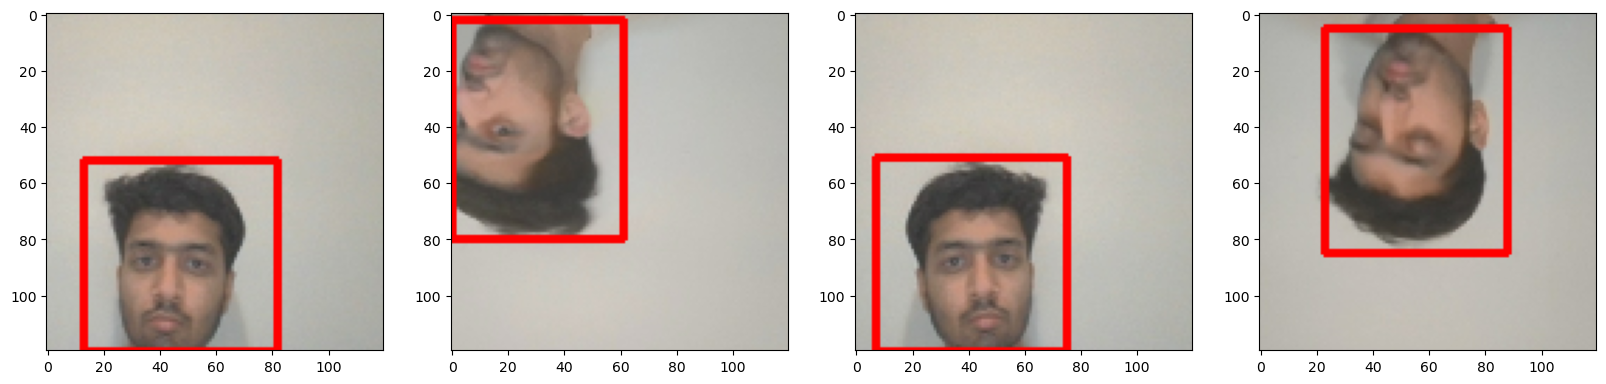

In [176]:


fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx in range(4): 
    sample_image = res[0][idx].copy()  # Ensure the image is writable
    sample_coords = res[1][1][idx]
    
    # Convert coordinates from normalized (0-1) to actual image size
    start_point = tuple(np.multiply(sample_coords[:2], [120,120]).astype(int))
    end_point = tuple(np.multiply(sample_coords[2:], [120,120]).astype(int))
    
    # Draw rectangle on the image
    cv2.rectangle(sample_image, start_point, end_point, (255,0,0), 2)

    # Display the image
    ax[idx].imshow(sample_image)

plt.show()


In [90]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [216]:
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(None, None, 3))

In [217]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [218]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [219]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.1323 , 0.0998 , 0.979  , 0.672  ],
        [0.1703 , 0.333  , 0.8027 , 1.     ],
        [0.2186 , 0.02628, 0.7563 , 0.6914 ],
        [0.0774 , 0.01743, 0.632  , 0.6426 ],
        [0.1255 , 0.0598 , 0.972  , 0.632  ],
        [0.1407 , 0.     , 0.6606 , 0.614  ],
        [0.2798 , 0.301  , 1.     , 1.     ],
        [0.4736 , 0.341  , 1.     , 0.9434 ]], dtype=float16))

In [220]:
facetracker = build_model()

In [221]:
facetracker.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)    │ (None, 120, 120, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ vgg16 (Functional)            │ (None, 3, 3, 512)         │      14,714,688 │ input_layer_8[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_max_pooling2d_5        │ (None, 512)               │               0 │ vgg16[0][0]                │
│ (GlobalMaxPooling2D)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_max_pooling2d_6        │ (None, 512)               │               0 │ vgg16[0][0]                │
│ (GlobalMaxPooling2D)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_10 (Dense)              │ (None, 2048)              │       1,050,624 │ global_max_pooling2d_5[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_12 (Dense)              │ (None, 2048)              │       1,050,624 │ global_max_pooling2d_6[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_11 (Dense)              │ (None, 1)                 │           2,049 │ dense_10[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_13 (Dense)              │ (None, 4)                 │           8,196 │ dense_12[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 16,826,181 (64.19 MB)

 Trainable params: 16,826,181 (64.19 MB)

 Non-trainable params: 0 (0.00 B)

In [222]:
X,y = train.as_numpy_iterator().next()

In [223]:
train

<_MapDataset element_spec=(TensorSpec(shape=(None, 120, 120, None), dtype=tf.float32, name=None), (TensorSpec(shape=(None, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 4), dtype=tf.float16, name=None)))>

In [224]:
X.shape

(8, 120, 120, 3)

In [225]:
classes, coords = facetracker.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


In [226]:
classes, coords

(array([[0.3055326 ],
        [0.35944125],
        [0.3203136 ],
        [0.33503616],
        [0.31868562],
        [0.30259228],
        [0.32323247],
        [0.28777072]], dtype=float32),
 array([[0.3488274 , 0.5176308 , 0.43949586, 0.48912698],
        [0.3755702 , 0.443469  , 0.47574368, 0.48562336],
        [0.39342168, 0.4976811 , 0.48019823, 0.46323115],
        [0.3781203 , 0.41492376, 0.46138775, 0.47113898],
        [0.34481615, 0.47836572, 0.466306  , 0.43686423],
        [0.34124202, 0.47304094, 0.4630705 , 0.4319818 ],
        [0.3412081 , 0.5621846 , 0.44188607, 0.45738867],
        [0.38241437, 0.46055046, 0.5045105 , 0.47812292]], dtype=float32))

In [227]:
len(train)

473

In [228]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 - 1)/batches_per_epoch

In [229]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.0001)

In [230]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [231]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [232]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=5.531114>

In [233]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=1.1443461>

In [234]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=5.531114>

In [235]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [236]:
model = FaceTracker(facetracker)

In [237]:
model.compile(opt, classloss, regressloss)

In [238]:
logdir = 'logs'

In [239]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [240]:
hist = model.fit(train, epochs = 40, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/40
473/473 ━━━━━━━━━━━━━━━━━━━━ 293s 594ms/step - class_loss: 0.0085 - regress_loss: 0.1439 - total_loss: 0.1482 - val_class_loss: 2.8509e-05 - val_regress_loss: 0.0393 - val_total_loss: 0.0393
Epoch 2/40
473/473 ━━━━━━━━━━━━━━━━━━━━ 267s 560ms/step - class_loss: 8.4866e-06 - regress_loss: 0.0456 - total_loss: 0.0456 - val_class_loss: 2.1241e-06 - val_regress_loss: 0.0619 - val_total_loss: 0.0619
Epoch 3/40
473/473 ━━━━━━━━━━━━━━━━━━━━ 267s 560ms/step - class_loss: 2.3417e-06 - regress_loss: 0.0270 - total_loss: 0.0270 - val_class_loss: 2.0821e-08 - val_regress_loss: 0.0507 - val_total_loss: 0.0507
Epoch 4/40
473/473 ━━━━━━━━━━━━━━━━━━━━ 267s 561ms/step - class_loss: 9.2199e-07 - regress_loss: 0.0178 - total_loss: 0.0178 - val_class_loss: 1.8234e-07 - val_regress_loss: 0.0472 - val_total_loss: 0.0472
Epoch 5/40
473/473 ━━━━━━━━━━━━━━━━━━━━ 268s 561ms/step - class_loss: 5.6382e-07 - regress_loss: 0.0121 - total_loss: 0.0121 - val_class_loss: 2.0246e-08 - val_regress_loss: 0.0316

In [241]:
hist.history

{'class_loss': [4.005830305686686e-06,
  3.6070016449230025e-06,
  1.3015181821174338e-07,
  8.075285506947694e-08,
  2.3549732759420294e-06,
  3.2757111512182746e-07,
  1.1676402067450908e-08,
  9.436179482236184e-08,
  1.90768844277045e-07,
  1.5716826951006624e-08,
  3.172928941808095e-08,
  1.5223472260572635e-08,
  8.323143063648786e-09,
  8.859925060278329e-08,
  9.581226834143308e-08,
  9.614422591397442e-10,
  1.652031933474518e-08,
  1.176510355804794e-08,
  3.175043516989717e-08,
  1.1378595843325456e-07,
  5.09375785995303e-09,
  2.3210697808195846e-09,
  8.470971124552307e-08,
  7.168307059046697e-10,
  1.585634201717312e-08,
  4.771376183043685e-09,
  1.1079697159743773e-08,
  1.0564930041923049e-09,
  5.5006048604866464e-09,
  5.568782768250458e-09,
  1.0207353851043877e-09,
  1.4061454223224246e-08,
  4.063858582981084e-09,
  4.936966391255737e-10,
  1.3216032712648484e-09,
  8.066493029090793e-10,
  1.2496405688011691e-08,
  1.3203219628721286e-09,
  7.11627334837317e-0

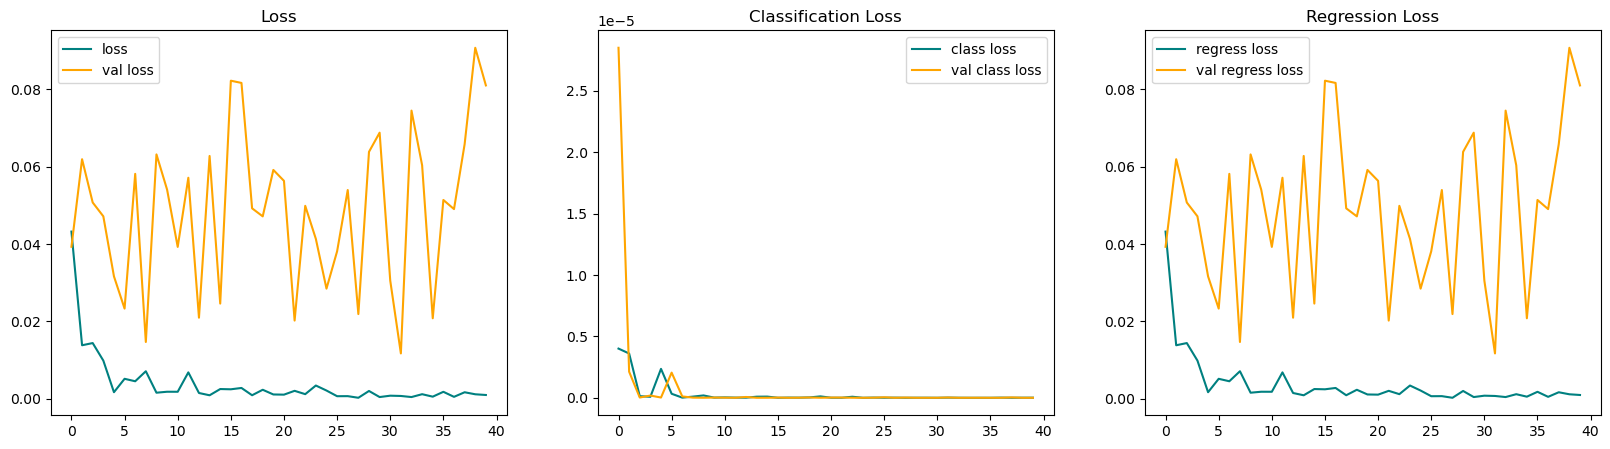

In [242]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [243]:
test_data = test.as_numpy_iterator()

In [255]:
test_sample = test_data.next()

In [257]:
yhat = facetracker.predict(test_sample[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


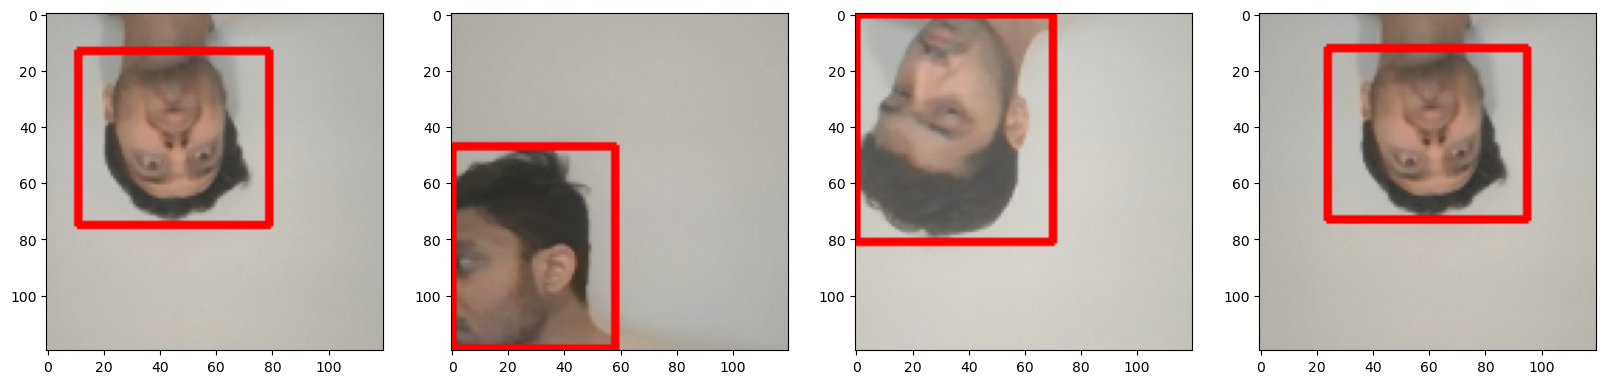

In [258]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx].copy()
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [248]:
from tensorflow.keras.models import load_model

In [249]:
facetracker.save('facetracker.h5')

In [250]:
facetracker = load_model('facetracker.h5')

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from IPython.display import display, clear_output
from PIL import Image
import time

# Open webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
    cap.release()

try:
    while True:
        ret, frame = cap.read()

        if not ret or frame is None:
            print("Failed to capture frame. Exiting...")
            break

        frame = frame[50:500, 50:500, :]

        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        resized = tf.image.resize(rgb, (120, 120))

        # Dummy model prediction (Replace with actual facetracker model)
        yhat = [0.8, [[0.1, 0.2, 0.5, 0.6]]]  # Simulating a prediction output
        sample_coords = yhat[1][0]

        if yhat[0] > 0.5:
            cv2.rectangle(frame,
                          tuple(np.multiply(sample_coords[:2], [450, 450]).astype(int)),
                          tuple(np.multiply(sample_coords[2:], [450, 450]).astype(int)),
                          (255, 0, 0), 2)

            cv2.putText(frame, 'Face',
                        tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int), [0, -5])),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        frame_pil = Image.fromarray(frame)

        clear_output(wait=True)
        display(frame_pil)

        time.sleep(0.05)  # Add small delay for smoother display

        # Press 'q' to exit
        key = cv2.waitKey(1) & 0xFF
        if key == ord('q'):
            print("Exiting webcam stream...")
            break

except KeyboardInterrupt:
    print("Stream stopped manually.")

finally:
    cap.release()  # Release the camera
    print("Camera released.")


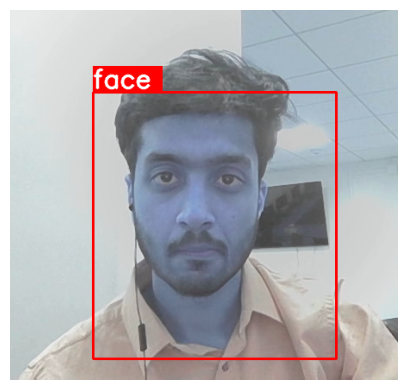

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1367: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


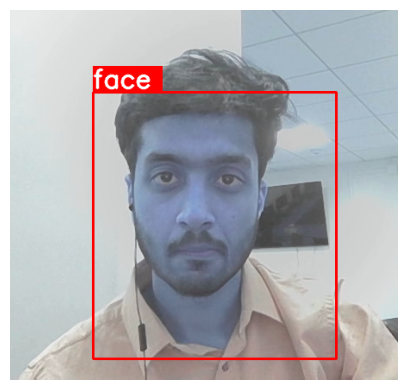

In [274]:
import cv2
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from IPython.display import display, clear_output

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()

    if not ret or frame is None:  # Check if frame is valid
        print("Failed to capture frame. Exiting...")
        break

    frame = frame[50:500, 50:500, :]

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120, 120))

    yhat = facetracker.predict(np.expand_dims(resized / 255, 0))
    sample_coords = yhat[1][0]

    if yhat[0] > 0.5:
        # Controls the main rectangle
        cv2.rectangle(frame,
                      tuple(np.multiply(sample_coords[:2], [450, 450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450, 450]).astype(int)),
                      (255, 0, 0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame,
                      tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int),
                                   [0, -30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int),
                                   [80, 0])),
                      (255, 0, 0), -1)

        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int),
                                                [0, -5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    # Display in Jupyter Notebook using Matplotlib
    clear_output(wait=True)  # Clear previous frame
    plt.figure(figsize=(5, 5))
    plt.imshow(frame)
    plt.axis("off")
    display(plt.gcf())  # Show updated frame

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

#cap.release()


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from IPython.display import display, clear_output
import time

cap = cv2.VideoCapture(0)  # Open webcam

if not cap.isOpened():
    print("Error: Could not open webcam.")
    cap.release()

try:
    while True:
        ret, frame = cap.read()

        if not ret or frame is None:
            print("Failed to capture frame. Exiting...")
            break

        frame = frame[50:500, 50:500, :]

        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        resized = tf.image.resize(rgb, (120, 120))

        yhat = facetracker.predict(np.expand_dims(resized / 255, 0))
        sample_coords = yhat[1][0]

        if yhat[0] > 0.5:
            # Controls the main rectangle
            cv2.rectangle(frame,
                          tuple(np.multiply(sample_coords[:2], [450, 450]).astype(int)),
                          tuple(np.multiply(sample_coords[2:], [450, 450]).astype(int)),
                          (255, 0, 0), 2)
            # Controls the label rectangle
            cv2.rectangle(frame,
                          tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int),
                                       [0, -30])),
                          tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int),
                                       [80, 0])),
                          (255, 0, 0), -1)

            # Controls the text rendered
            cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int),
                                                    [0, -5])),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Convert image format for Jupyter Notebook
        _, buffer = cv2.imencode('.jpg', cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        img_display = buffer.tobytes()

        # Clear output and display the new frame
        clear_output(wait=True)
        display(display(Image(data=img_display)))

        # Add a small delay for smoother display
        time.sleep(0.05)

except KeyboardInterrupt:
    print("Stream stopped manually.")

finally:
    cap.release()
    print("Camera released.")
